In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
from matplotlib import pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn import metrics
data = sklearn.datasets.load_iris()
Features = data.data
iris_class = data.target
X_train,X_test,y_train,y_test = train_test_split(Features,iris_class,test_size = 0.2,random_state = 27)

In [12]:

model = RandomForestClassifier(n_estimators  = 20 )
model = model.fit(X_train,y_train)
y_pred = model.predict(X_train)

train_acc = metrics.accuracy_score(y_train,y_pred)
print(f'Train acc: {train_acc:.2%}')


p_pred = model.predict(X_test)
test_acc = metrics.accuracy_score(y_test,p_pred)
print(f'Test acc: {test_acc:.2%}')


Train acc: 99.17%
Test acc: 86.67%


In [13]:
rf_classifier = RandomForestClassifier()
test_acc = []
train_acc = []
for i in range(1,21):
    model = RandomForestClassifier(max_depth = i)
    
    model = model.fit(X_train,y_train)
    y_pred = model.predict(X_train)
    
    train_accuracy = metrics.accuracy_score(y_train,y_pred)
    train_acc.append(train_accuracy)

    p_pred = model.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test,p_pred)
    test_acc.append(test_accuracy)

    print(f'>> {i} Train: {train_accuracy:>3f}--- Test: {test_accuracy:>3f}')

>> 1 Train: 0.975000--- Test: 0.900000
>> 2 Train: 0.975000--- Test: 0.900000
>> 3 Train: 0.983333--- Test: 0.900000
>> 4 Train: 0.991667--- Test: 0.866667
>> 5 Train: 1.000000--- Test: 0.866667
>> 6 Train: 1.000000--- Test: 0.866667
>> 7 Train: 1.000000--- Test: 0.866667
>> 8 Train: 1.000000--- Test: 0.866667
>> 9 Train: 1.000000--- Test: 0.900000
>> 10 Train: 1.000000--- Test: 0.866667
>> 11 Train: 1.000000--- Test: 0.866667
>> 12 Train: 1.000000--- Test: 0.900000
>> 13 Train: 1.000000--- Test: 0.900000
>> 14 Train: 1.000000--- Test: 0.866667
>> 15 Train: 1.000000--- Test: 0.866667
>> 16 Train: 1.000000--- Test: 0.900000
>> 17 Train: 1.000000--- Test: 0.900000
>> 18 Train: 1.000000--- Test: 0.866667
>> 19 Train: 1.000000--- Test: 0.900000
>> 20 Train: 1.000000--- Test: 0.900000


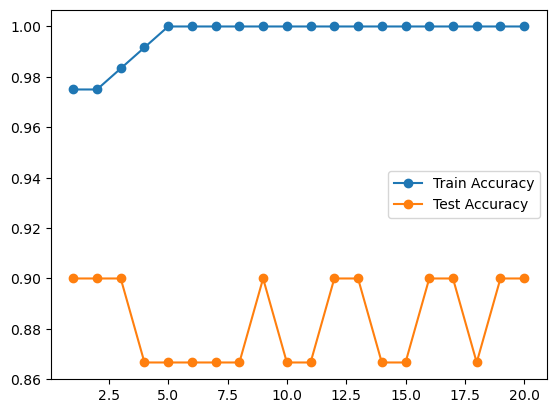

In [14]:
pyplot.plot(list(range(1,21)),train_acc,'-o',label = 'Train Accuracy')
pyplot.plot(list(range(1,21)),test_acc,'-o',label = 'Test Accuracy')
pyplot.legend()
pyplot.show()

In [15]:
param_grid = {
    'n_estimators': [50,80, 100, 150, 180,200,220],
    'max_depth': [2,5, 10,15, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(),param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 80, 100, 150, 180, 200, 220]},
             scoring='accuracy')

In [16]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20)

In [17]:
print(f'Training accuacy : {metrics.accuracy_score(y_train,grid_search.best_estimator_.predict(X_train)):.2%}')
print(f'Testing accuracy : {metrics.accuracy_score(y_test,grid_search.best_estimator_.predict(X_test)):.2%}')

Training accuacy : 100.00%
Testing accuracy : 90.00%
